# LSTM과 CNN을 조합해 영화 리뷰 분류하기

> 이번에 쓸 Internet Movie DataBase(IMDB)는 영화와 관련된 정보 데이터가 저장된 자료로 이미 전처리가 되어있다. 이 영화과 긍정적인지 부정적인지 평가도 포함되어있다.(긍정 부정 두 가지뿐이라 원-핫 인코딩 과정은 없다)



In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, Embedding, Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
from keras.datasets import imdb

import matplotlib.pyplot as plt
import numpy as np

- Conv1D는 Conv2D의 개념을 1차원으로 옮긴 것(컨볼루션 층이 1차원이고 배열도 1차원)
- MaxPooling1D도 마찬가지로 2차원 배열을 1차원으로 바꾸어 정해진 구역안의 가장 큰 값을 다음 층으로 넘긴다.

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 134s 279ms/step - loss: 0.4030 - accuracy: 0.8072 - val_loss: 0.3050 - val_accuracy: 0.8723
Epoch 2/100
469/469 [==============================] - 135s 287ms/step - loss: 0.2392 - accuracy: 0.9066 - val_loss: 0.2592 - val_accuracy: 0.8907
Epoch 3/100
469/469 [==============================] - 141s 300ms/step - loss: 0.1902 - accuracy: 0.9278 - val_loss: 0.2617 - val_accuracy: 0.8902
Epoch 4/100
469/469 [==============================] - 121s 257ms/step - loss: 0.1562 - accuracy: 0.9409 - val_loss: 0.2775 - val_accuracy: 0.8906
Epoch 5/100
469/469 [==============================] - 116s 248ms/step - loss: 0.1258 - accuracy: 0.9549 - val_loss: 0.3215 - val_accuracy: 0.8834


In [5]:
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 34s 43ms/step - loss: 0.3539 - accuracy: 0.8726

 Test Accuracy: 0.8726


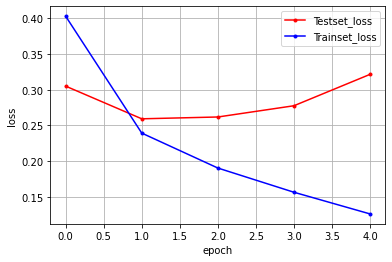

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()